<a href="https://colab.research.google.com/github/overtunned/Object-classification-using-cnn-motorcycle/blob/main/Real_Object_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/overtunned/Object-classification-using-cnn-motorcycle.git

fatal: destination path 'Object-classification-using-cnn-motorcycle' already exists and is not an empty directory.


In [2]:
!ls Object-classification-using-cnn-motorcycle

1.mat
alexnet_11am
alexnet_11am.zip
AlexNet-architecture-Includes-5-convolutional-layers-and-3-fullyconnected-layers.png
dataset
media
Object_Detection_Using_CNN.ipynb
predict-image-category-from-256-categories-new.ipynb
README
README.md
Real_Object_Detection_Using_CNN.ipynb


In [3]:
# import pandas as pd
import numpy as np
# import os
from os import listdir
from glob import glob
# import itertools
# import fnmatch
import random
# from PIL import Image
# import zlib
# import csv
import math
# from tqdm import tqdm
import matplotlib.pylab as plt
# import seaborn as sns
import cv2
# import skimage
# from skimage import transform
# from skimage.transform import resize
# import scipy
# from scipy import misc
import keras
# from keras import backend as K
# from keras import models, layers, optimizers
# from keras.applications.inception_v3 import InceptionV3
# from keras.applications.vgg16 import preprocess_input, VGG16
# from keras.models import Model, Sequential, model_from_json
# from keras.layers import Dense, Dropout, Input, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D, Lambda, AveragePooling2D
# from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam
import sklearn
# from sklearn import model_selection
# from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.utils import class_weight
# %matplotlib inline

In [4]:
#@title
# #@title
# import cv2
# import scipy.io as sio
# from os import listdir
# from os.path import isfile,join,isdir
# import numpy as np
# from matplotlib.path import Path
# import os

# """ Caltech-101 dataset has images belonging to 101 different Categories. The dataset also provides us with annotation 
# for each image which helps us to crop the foreground image and get rid of background in the image.

# In this file the foreground/area of intereset in the image is cropped by ignoring the background
#  and all the cropped out images are written to a folder and also values of each and every image is appended
#  in array and stored in .mat file in order to avoid converting image to array every time we run the program
# """
# def load_data_shared():

# # Navigate to  main directory in which there are 101 subdirectories containing images.
#     mypath = '/Users/manaswipodduturi/Documents/Research/MachineLearning/Data/Caltech/101_ObjectCategories'
# # Process all the folders in the main directory
#     folders = [folder for folder in listdir(mypath) if isdir(join(mypath,folder))]
#     all_images = np.array([])
#     all_labels = np.array([],dtype=np.uint8)
# # Process all the images in each and every folder in the main directory.
#     for j in xrange(0,len(folders)):
#       files = [file for file in listdir(join(mypath,folders[j])) if (isfile(join(mypath,folders[j],file)) & bool(file!='.DS_Store')) ]
#       images = np.empty(len(files),dtype=object)
#       labels = np.empty(len(files),dtype=np.uint8)
#   #Convert each and every image to array and append array values of all the images
#       for n in xrange(0,len(files)):
#           images[n] = cv2.imread(join(mypath,folders[j],files[n]))
#           labels.fill(j)
#       all_images = np.append(all_images,images)
#       all_labels = np.append(all_labels,labels)

# # Navigate to  main directory in which there are 101 subdirectories containing annotation of each image.
#     mypath = '/Users/manaswipodduturi/Documents/Research/MachineLearning/Data/Caltech/Annotations'
#     folders = [folder for folder in listdir(mypath) if isdir(join(mypath,folder))]
#     all_annotations = np.array([])
#     for j in xrange(0,len(folders)):
#         files = [file for file in listdir(join(mypath,folders[j])) if (isfile(join(mypath,folders[j],file)) & bool(file!='.DS_Store'))]
#         annotations = np.empty(len(files),dtype=object)
# # Get array of annotations for each image from .mat file and append annotations of all the images
#         for n in xrange(0,len(files)):
#             annotations[n] = sio.loadmat(join(mypath,folders[j],files[n]))
#         all_annotations = np.append(all_annotations,annotations)

# # Navigate to  directory where you want to write cropped images.
#     os.chdir('/Users/manaswipodduturi/Documents/Research/MachineLearning/Data/Caltech/processed_images1')
#     image_with_annotation = np.empty((all_images.shape[0],150*100),dtype=object)
#     for i in xrange(0,all_images.shape[0]):
#         image = all_images[i]
#         image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# # Contour is a rough coordinates, which help us find the area of interest in the image
#         contour = all_annotations[i]['obj_contour']
# #Box coordinates provides us with rough rectangular outline of our area of interest in the image
#         box = all_annotations[i]['box_coord']
#         contour = np.transpose(contour)
#         contour[:,0]=contour[:,0]+box[:,2]
#         contour[:,1]=contour[:,1]+box[:,0]
# # Outline/sketch the ares of interest in the image and find all the points inside that region
#         p= Path(contour[:-2])
#         mask = np.zeros((image.shape),dtype=np.uint8)
#         for y in xrange(box[0,0],box[0,1]+1):
#             for x in xrange(box[0,2],box[0,3]+1):
#                 bool_value = p.contains_point([x,y])
#                 if bool_value:
#                     mask[y-1,x-1]=1
#         image = image*mask
# #Write crooped out image to the subfolder
#         #cv2.imwrite('image'+str(i+1)+'.jpg',image)
# #append value of each image to an array
#         image = cv2.resize(image, (100,150))
#         image_with_annotation[i] = np.ravel(image)
#     sio.savemat('/Users/manaswipodduturi/Documents/Research/MachineLearning/NeuralNets/Caltech/caltech_data.mat',
#         {'features':image_with_annotation,
#          'labels' : all_labels})

In [5]:
#@title
# import scipy.io as sio
# annot = sio.loadmat(path+'1.mat')
# coor = annot['SubDir_Data'].T
# print(coor[0,:])
# x1, y1 = int(coor[0,2]),int(coor[0,3])
# x2, y2 = int(coor[0,6]),int(coor[0,7])

In [6]:
#@title
# img = cv2.imread(path+'/1/0001.jpg')
# plt.imshow(img[y1:y2,x1:x2])

In [7]:
path ='Object-classification-using-cnn-motorcycle/dataset/'

In [8]:
def loadBatchImages(path):
    catList = listdir(path)
    loadedImagesTrain = []
    loadedLabelsTrain = []
    loadedImagesVal = []
    loadedLabelsVal = []
    for cat in catList:
        deepPath = path+cat+"/"
        imageList = listdir(deepPath)
        for images in imageList:                
            img = cv2.imread(deepPath + images)
            img = cv2.resize(img, (227,227))
            loadedLabelsTrain.append(int(cat))
            loadedImagesTrain.append(img)
    return loadedImagesTrain,to_categorical(loadedLabelsTrain)

In [9]:
def shuffledSet(a, b, test_proportion=0.2, val_proportion=0.2):
    assert np.shape(a)[0] == np.shape(b)[0]
    p = np.random.permutation(np.shape(a)[0])
    num_test = math.ceil(len(p)* test_proportion)
    num_val = math.ceil(len(p) * val_proportion)
    s1 = p[num_test + num_val:]
    s2 = p[num_test: num_test + num_val]
    s3 = p[0:num_test]
    return (a[s1], b[s1]), (a[s2], b[s2]), (a[s3], b[s3])

In [10]:
data, labels = loadBatchImages(path)

In [11]:
# data = preprocess_input(np.float64(data))
# dataVal = preprocess_input(np.float64(dataVal))
train, val, test = shuffledSet(np.asarray(data),labels,0.2,0.1)
# val = shuffledSet(np.asarray(dataVal),labelsVal)

In [12]:
# Split out features and labels
X_train, y_train = train[0], train[1]
X_val, y_val = val[0], val[1]
X_test, y_test = test[0],test[1]

In [13]:
#already 4 dimensional
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(2849, 227, 227, 3)
(814, 227, 227, 3)
(407, 227, 227, 3)


In [14]:
# STOP: Do not change the tests below. Your implementation should pass these tests.
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (227, 227, 3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (227, 227, 3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (227, 227, 3)), "The dimensions of the images are not 32 x 32 x 3."

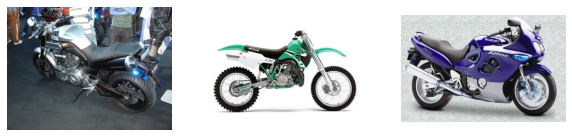

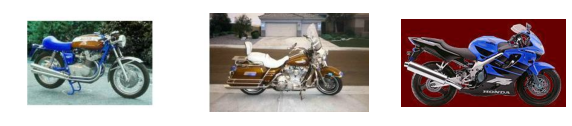

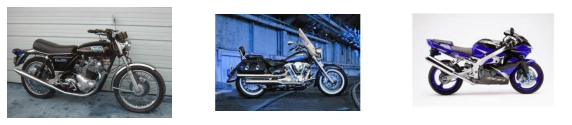

In [15]:
multipleImages = glob(path+'1/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(10,10))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
    plt.axis('off')
plotThreeImages(multipleImages)
plotThreeImages(multipleImages)
plotThreeImages(multipleImages)

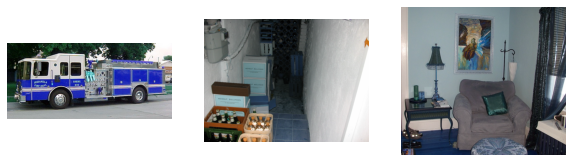

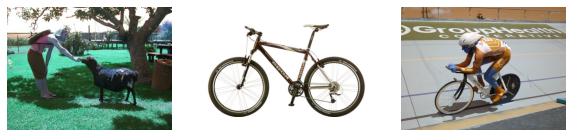

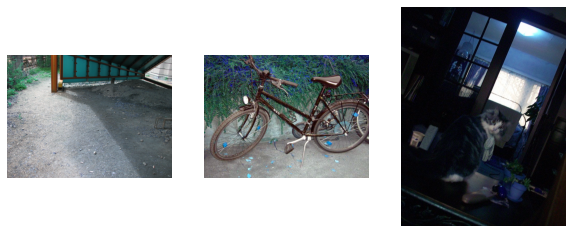

In [16]:
multipleImages = glob(path+'0/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(10,10))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
    plt.axis('off')
plotThreeImages(multipleImages)
plotThreeImages(multipleImages)
plotThreeImages(multipleImages)

[1618, 1231]


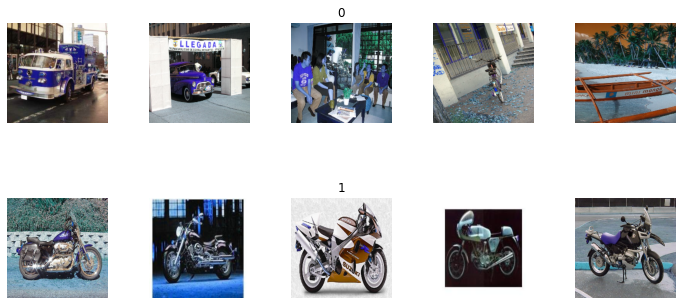

In [17]:
num_of_samples=[]
cols = 5
num_classes = 2
labels = [0,1]
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(10,5))
fig.tight_layout()
y_data = np.argmax(y_train , axis=-1)
 
for i in range(cols):
    for j in labels:
      x_selected = X_train[y_data == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))
print(num_of_samples)

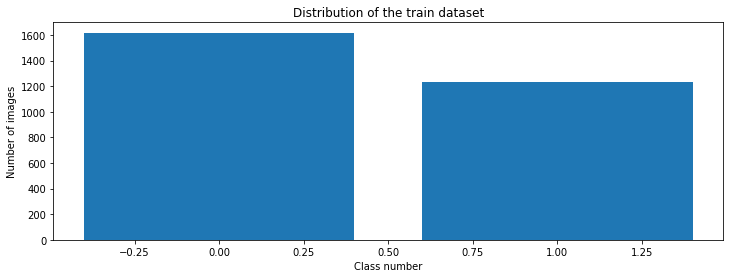

In [18]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [19]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.4,
                            shear_range=0.2,
                            rotation_range=10.)
 
datagen.fit(X_train)

In [20]:
def modified_model(lr=0.0001): 
  model=keras.models.Sequential([
      keras.layers.Conv2D(filters=512, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),

      keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="valid"),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(3,3)),

      keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="valid"),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="valid"),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="valid"),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),


      keras.layers.Flatten(),
      keras.layers.Dense(2048,activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1024,activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1024,activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(2,activation='softmax')
  ])
  model.compile(Adam(lr), loss="categorical_crossentropy", metrics=["accuracy"])
  return model

In [21]:
!pip install -q pyyaml h5py
!mkdir -p saved_model
 import pickle
 from google.colab import files

In [22]:
#@title Ploting Codes
# Helper Functions for Learning Curve and Confusion Matrix
import itertools
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy')[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.ylabel('Accuracy')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_learning_curve(history):
    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'Val'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

In [49]:
def con_report(model,history):
  y_pred = model.predict(X_test)
  Y_pred_classes = np.argmax(y_pred,axis = 1) 
  Y_true = np.argmax(y_test,axis = 1) 
  confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
  plot_confusion_matrix(confusion_mtx, classes = list(labels))
  print(classification_report(Y_true, Y_pred_classes))
  plot_learning_curve(history)

In [32]:
model1 = modified_model(0.001)

In [33]:
history1 = model1.fit(X_train, 
                      y_train, 
                      batch_size=10,
                      validation_data=(X_val, y_val),
                      epochs=10, 
                      shuffle = 1,
                      verbose =1)

Epoch 1/10
285/285 [==============================] - 11s 33ms/step - loss: 1.4076 - accuracy: 0.7018 - val_loss: 0.7336 - val_accuracy: 0.6192
Epoch 2/10
285/285 [==============================] - 8s 30ms/step - loss: 0.4583 - accuracy: 0.8371 - val_loss: 0.2851 - val_accuracy: 0.9017
Epoch 3/10
285/285 [==============================] - 9s 30ms/step - loss: 0.3102 - accuracy: 0.8912 - val_loss: 0.3623 - val_accuracy: 0.9066
Epoch 4/10
285/285 [==============================] - 9s 30ms/step - loss: 0.2798 - accuracy: 0.8912 - val_loss: 0.3013 - val_accuracy: 0.8870
Epoch 5/10
285/285 [==============================] - 9s 30ms/step - loss: 0.2318 - accuracy: 0.9229 - val_loss: 0.2348 - val_accuracy: 0.8993
Epoch 6/10
285/285 [==============================] - 9s 30ms/step - loss: 0.2654 - accuracy: 0.9133 - val_loss: 0.6146 - val_accuracy: 0.8550
Epoch 7/10
285/285 [==============================] - 8s 30ms/step - loss: 0.2479 - accuracy: 0.9158 - val_loss: 0.6992 - val_accuracy: 0.796

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       469
           1       0.99      0.66      0.80       345

    accuracy                           0.86       814
   macro avg       0.90      0.83      0.84       814
weighted avg       0.88      0.86      0.85       814



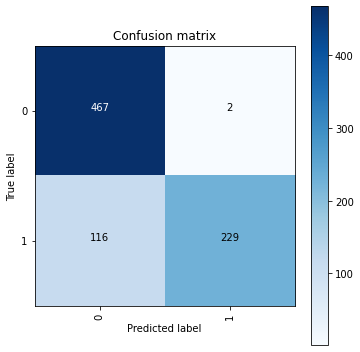

In [35]:
con_report(model1,history1)

In [29]:
model2 = modified_model(0.0001)

In [30]:
history2 = model2.fit(X_train, y_train, batch_size=20,
                               validation_data=(X_val, y_val),
                               epochs=30, 
                               shuffle = 1,
                               verbose =1)

Epoch 1/30
143/143 [==============================] - 9s 54ms/step - loss: 0.7553 - accuracy: 0.6827 - val_loss: 0.2998 - val_accuracy: 0.8968
Epoch 2/30
143/143 [==============================] - 7s 50ms/step - loss: 0.3705 - accuracy: 0.8523 - val_loss: 0.2628 - val_accuracy: 0.9017
Epoch 3/30
143/143 [==============================] - 7s 48ms/step - loss: 0.3222 - accuracy: 0.8820 - val_loss: 0.4582 - val_accuracy: 0.8403
Epoch 4/30
143/143 [==============================] - 7s 48ms/step - loss: 0.2764 - accuracy: 0.8978 - val_loss: 0.3452 - val_accuracy: 0.8993
Epoch 5/30
143/143 [==============================] - 7s 48ms/step - loss: 0.1905 - accuracy: 0.9258 - val_loss: 0.3754 - val_accuracy: 0.8821
Epoch 6/30
143/143 [==============================] - 7s 48ms/step - loss: 0.2066 - accuracy: 0.9295 - val_loss: 0.2875 - val_accuracy: 0.9017
Epoch 7/30
143/143 [==============================] - 7s 47ms/step - loss: 0.1844 - accuracy: 0.9286 - val_loss: 0.2193 - val_accuracy: 0.9386

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       469
           1       0.91      0.94      0.92       345

    accuracy                           0.93       814
   macro avg       0.93      0.94      0.93       814
weighted avg       0.94      0.93      0.94       814



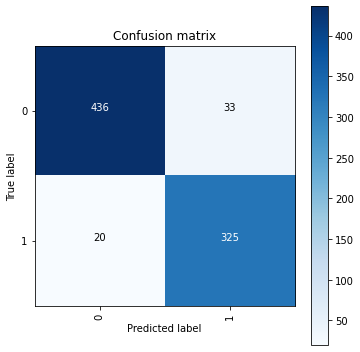

In [36]:
con_report(model2,history2)

In [38]:
model3 = modified_model(0.001)

In [39]:
history3 = model3.fit(X_train, y_train, batch_size=30,
                               validation_data=(X_val, y_val),
                               epochs=50, 
                               shuffle = 1,
                               verbose =1)

95/95 [==============================] - 6s 64ms/step - loss: 0.0251 - accuracy: 0.9912 - val_loss: 1.7651 - val_accuracy: 0.8673
Epoch 38/50
95/95 [==============================] - 6s 64ms/step - loss: 0.1043 - accuracy: 0.9711 - val_loss: 2.1369 - val_accuracy: 0.7248
Epoch 39/50
95/95 [==============================] - 6s 64ms/step - loss: 0.1532 - accuracy: 0.9406 - val_loss: 0.6149 - val_accuracy: 0.9287
Epoch 40/50
95/95 [==============================] - 6s 64ms/step - loss: 0.0887 - accuracy: 0.9763 - val_loss: 0.8990 - val_accuracy: 0.9238
Epoch 41/50
95/95 [==============================] - 6s 64ms/step - loss: 0.0583 - accuracy: 0.9814 - val_loss: 1.5085 - val_accuracy: 0.8943
Epoch 42/50
95/95 [==============================] - 6s 64ms/step - loss: 0.0456 - accuracy: 0.9869 - val_loss: 2.7994 - val_accuracy: 0.8280
Epoch 43/50
95/95 [==============================] - 6s 64ms/step - loss: 0.0241 - accuracy: 0.9890 - val_loss: 1.5403 - val_accuracy: 0.9042
Epoch 44/50
95/95 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       469
           1       0.96      0.90      0.93       345

    accuracy                           0.94       814
   macro avg       0.95      0.94      0.94       814
weighted avg       0.94      0.94      0.94       814



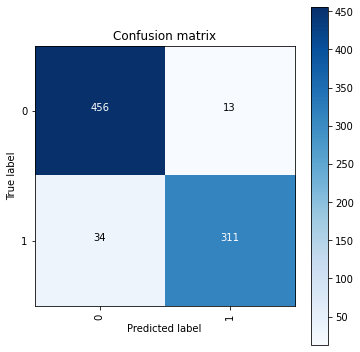

In [40]:
con_report(model3,history3)

In [41]:
model4 = modified_model(0.0001)

In [42]:
history4 = model4.fit(X_train, 
                      y_train, 
                      batch_size=40,
                      validation_data=(X_val, y_val),
                      epochs=100,
                      shuffle = 1,
                      verbose =1)

Epoch 1/100
72/72 [==============================] - 10s 90ms/step - loss: 0.8761 - accuracy: 0.6383 - val_loss: 1.0888 - val_accuracy: 0.4668
Epoch 2/100
72/72 [==============================] - 6s 83ms/step - loss: 0.4038 - accuracy: 0.8367 - val_loss: 0.3853 - val_accuracy: 0.8133
Epoch 3/100
72/72 [==============================] - 6s 82ms/step - loss: 0.3022 - accuracy: 0.8845 - val_loss: 0.2759 - val_accuracy: 0.8771
Epoch 4/100
72/72 [==============================] - 6s 82ms/step - loss: 0.2308 - accuracy: 0.9112 - val_loss: 0.3792 - val_accuracy: 0.8403
Epoch 5/100
72/72 [==============================] - 6s 82ms/step - loss: 0.2238 - accuracy: 0.9172 - val_loss: 0.2238 - val_accuracy: 0.9214
Epoch 6/100
72/72 [==============================] - 6s 82ms/step - loss: 0.1701 - accuracy: 0.9384 - val_loss: 0.2505 - val_accuracy: 0.9091
Epoch 7/100
72/72 [==============================] - 6s 82ms/step - loss: 0.1525 - accuracy: 0.9454 - val_loss: 0.2112 - val_accuracy: 0.9140
Epoch

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       469
           1       0.95      0.92      0.93       345

    accuracy                           0.94       814
   macro avg       0.94      0.94      0.94       814
weighted avg       0.94      0.94      0.94       814



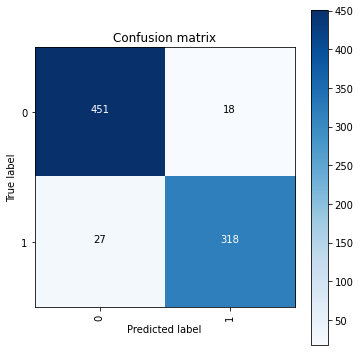

In [43]:
con_report(model4,history4)

In [45]:
model5 = modified_model(0.0001)

In [46]:
history5 = model5.fit(datagen.flow(X_train, y_train, batch_size=50),
                               validation_data=(X_val, y_val),
                               epochs=135, 
                               shuffle = 1,
                               verbose =1)

Epoch 1/135
57/57 [==============================] - 33s 509ms/step - loss: 0.8829 - accuracy: 0.6314 - val_loss: 1.2479 - val_accuracy: 0.4447
Epoch 2/135
57/57 [==============================] - 27s 465ms/step - loss: 0.5615 - accuracy: 0.7758 - val_loss: 0.4723 - val_accuracy: 0.7912
Epoch 3/135
57/57 [==============================] - 26s 460ms/step - loss: 0.4366 - accuracy: 0.8159 - val_loss: 0.3458 - val_accuracy: 0.8698
Epoch 4/135
57/57 [==============================] - 26s 461ms/step - loss: 0.3683 - accuracy: 0.8500 - val_loss: 0.3201 - val_accuracy: 0.8378
Epoch 5/135
57/57 [==============================] - 27s 464ms/step - loss: 0.3577 - accuracy: 0.8500 - val_loss: 0.2709 - val_accuracy: 0.8894
Epoch 6/135
57/57 [==============================] - 26s 460ms/step - loss: 0.3260 - accuracy: 0.8710 - val_loss: 0.3567 - val_accuracy: 0.8256
Epoch 7/135
57/57 [==============================] - 26s 461ms/step - loss: 0.2856 - accuracy: 0.8768 - val_loss: 0.2620 - val_accuracy:

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       469
           1       0.98      0.85      0.91       345

    accuracy                           0.93       814
   macro avg       0.94      0.92      0.93       814
weighted avg       0.93      0.93      0.93       814



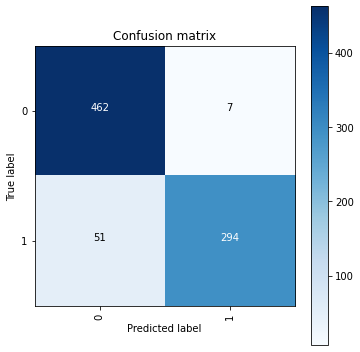

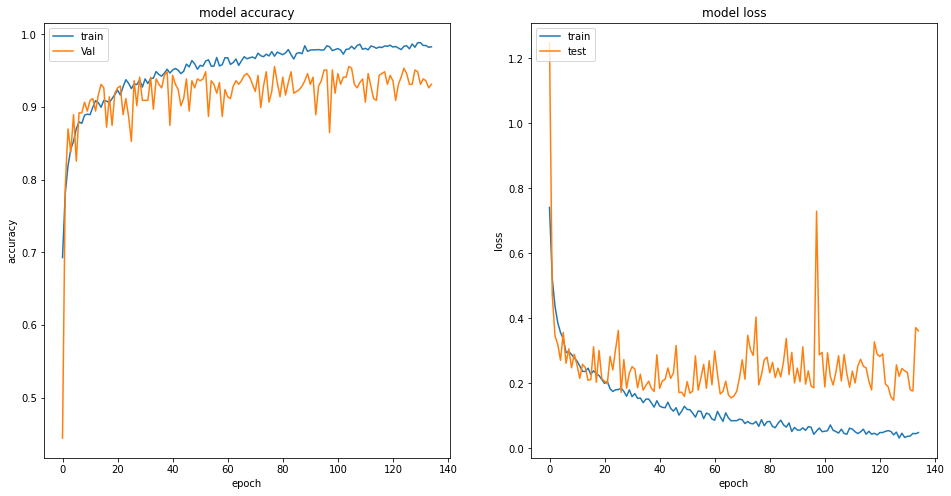

In [51]:
con_report(model5,history5)

In [56]:
with open('/content/DictHistory1', 'wb') as file_pi:
          pickle.dump(history1.history, file_pi)
with open('/content/DictHistory2', 'wb') as file_pi:
          pickle.dump(history1.history, file_pi)
with open('/content/DictHistory3', 'wb') as file_pi:
          pickle.dump(history1.history, file_pi)
with open('/content/DictHistory4', 'wb') as file_pi:
          pickle.dump(history1.history, file_pi)
with open('/content/DictHistory5', 'wb') as file_pi:
          pickle.dump(history1.history, file_pi)

In [25]:
model1.save('saved_model/alexnet1.h5')
files.download('saved_model/alexnet1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
model2.save('saved_model/alexnet2.h5')
files.download('saved_model/alexnet2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
model3.save('saved_model/alexnet3.h5')
files.download('saved_model/alexnet3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
model4.save('saved_model/alexnet4.h5')
files.download('saved_model/alexnet4.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
model5.save('saved_model/alexnet5.h5')
files.download('saved_model/alexnet5.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
history1 = pickle.load(open('/content/DictHistory1', "rb"))
history2 = pickle.load(open('/content/DictHistory1', "rb"))
history3 = pickle.load(open('/content/DictHistory1', "rb"))
history4 = pickle.load(open('/content/DictHistory1', "rb"))
history5 = pickle.load(open('/content/DictHistory1', "rb"))

In [ ]:
model = models.load_model('Object-classification-using-cnn-motorcycle/model1')
model.summary()

In [ ]:
# TODO: Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.26596179604530334
Test accuracy: 0.9262899160385132


(224, 224, 3)
predicted sign: [0]


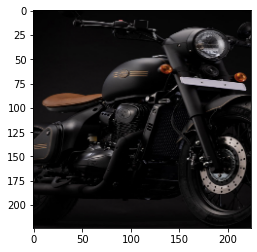

In [ ]:
import requests
from PIL import Image
url = 'https://images.jawamotorcycles.com/medium/m/perak/jawa-perak.png?v=1'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
img = np.asarray(img)
img = cv2.resize(img, (224, 224))
# img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 224, 224, 3)

print("predicted sign: "+ str(np.argmax(model.predict(img), axis=-1)))

(261, 500, 3)
(224, 224, 3)
predicted sign: [1]


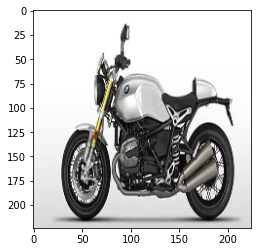

In [ ]:
import requests
from PIL import Image
url = 'https://static.autox.com/uploads/bikes/2021/02/bmw-r-ninet.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
img = np.asarray(img)
print(img.shape)
img = cv2.resize(img, (224, 224))
# img = preprocess(img)
plt.imshow(img)
print(img.shape)
img = img.reshape(1, 224, 224, 3)

print("predicted sign: "+ str(np.argmax(model.predict(img), axis=-1)))